# Tarifació social, és justa o no?

  
    
recentment he rebut dues bones notícies  

1) Afortunadament, el meu fill ha obtingut plaça a l'escola bressol municipal que havíem sol·licitat tot i tenir una probabilitat de 15/38. Són instal·lacions noves, prop de casa i el transport públic, així que perfecte.

2) El meu nucli familiar és  un 7/9 ric i no ho sabíem (ironía)

Resulta que les 10 quotes que s'han d'abonar a l'any s'ajusten segons el nivell de renta de la unitat familiar. La qual cosa em sembla molt bé, tot sigui dit. El que no m'acaba d'encaixar és que la nostra família amb uns ingressos molt ajustats a la mitja* (lleugeríssimament per sobre) caigui al tram 7. 7 d'un total de 9.  A partir d'ara, em centraré en famílies de 3 membres i escolarització de jornada completa + menjador (el meu cas)

\* mitja, entenent que els 2 progenitors treballem a jornada completa i el sou mitjà a Catalunya l'any 2018 va ser de 29.738€ bruts([Font](https://www.idescat.cat/pub/?id=aec&n=395)). A nivell d'unitat familiar ho desconec...  Update: [Aquí](https://www.agenciatributaria.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/irpfmunicipios/2018/jrubik434d52cd049d413ac69f5557b3dc668cad3fd533.html) es pot veure a nivell de municipi. Al 2018 les mitjanes aritmètiques a Terrassa van ser (independentment del tipus de jornada): 
- base imponible general = 22.225
- base imponible del ahorro = 2.397

que són les caselles de la declaració de la renda que s'utilitzen per triar el tram al que pertany la família. Multiplicant-ho per 2 (projenitors) suma 49244 => al mig del tram 7

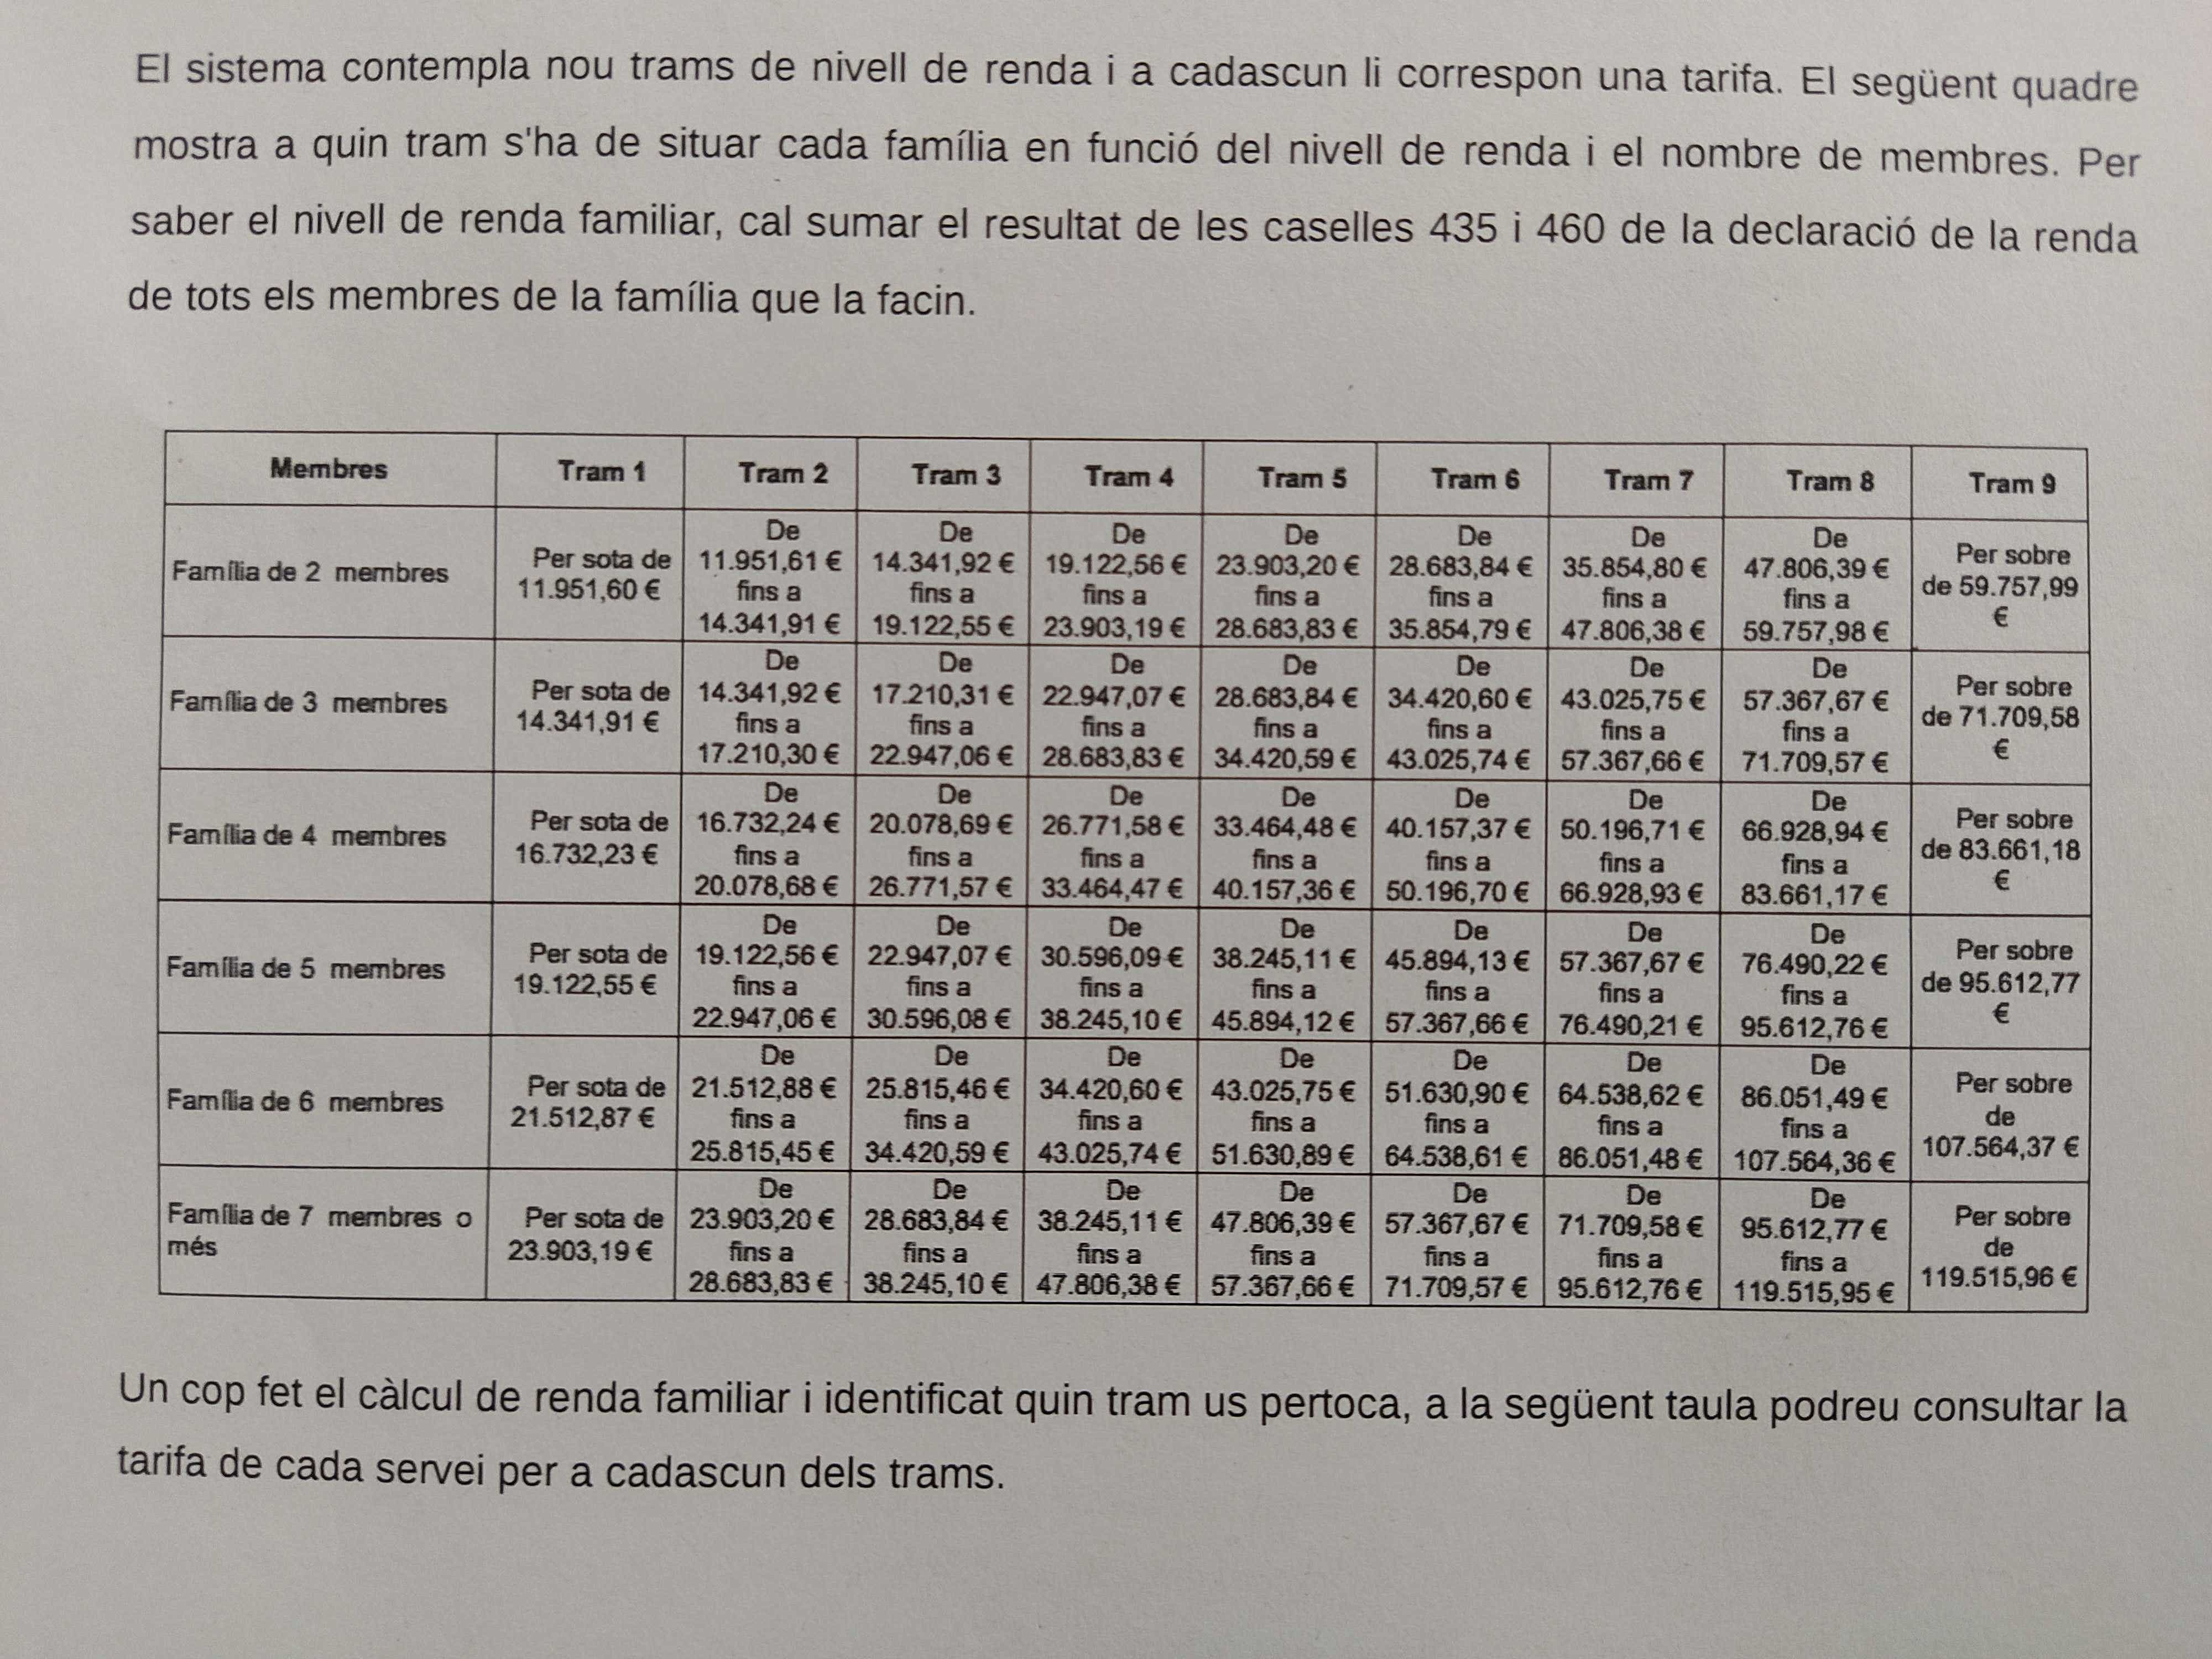

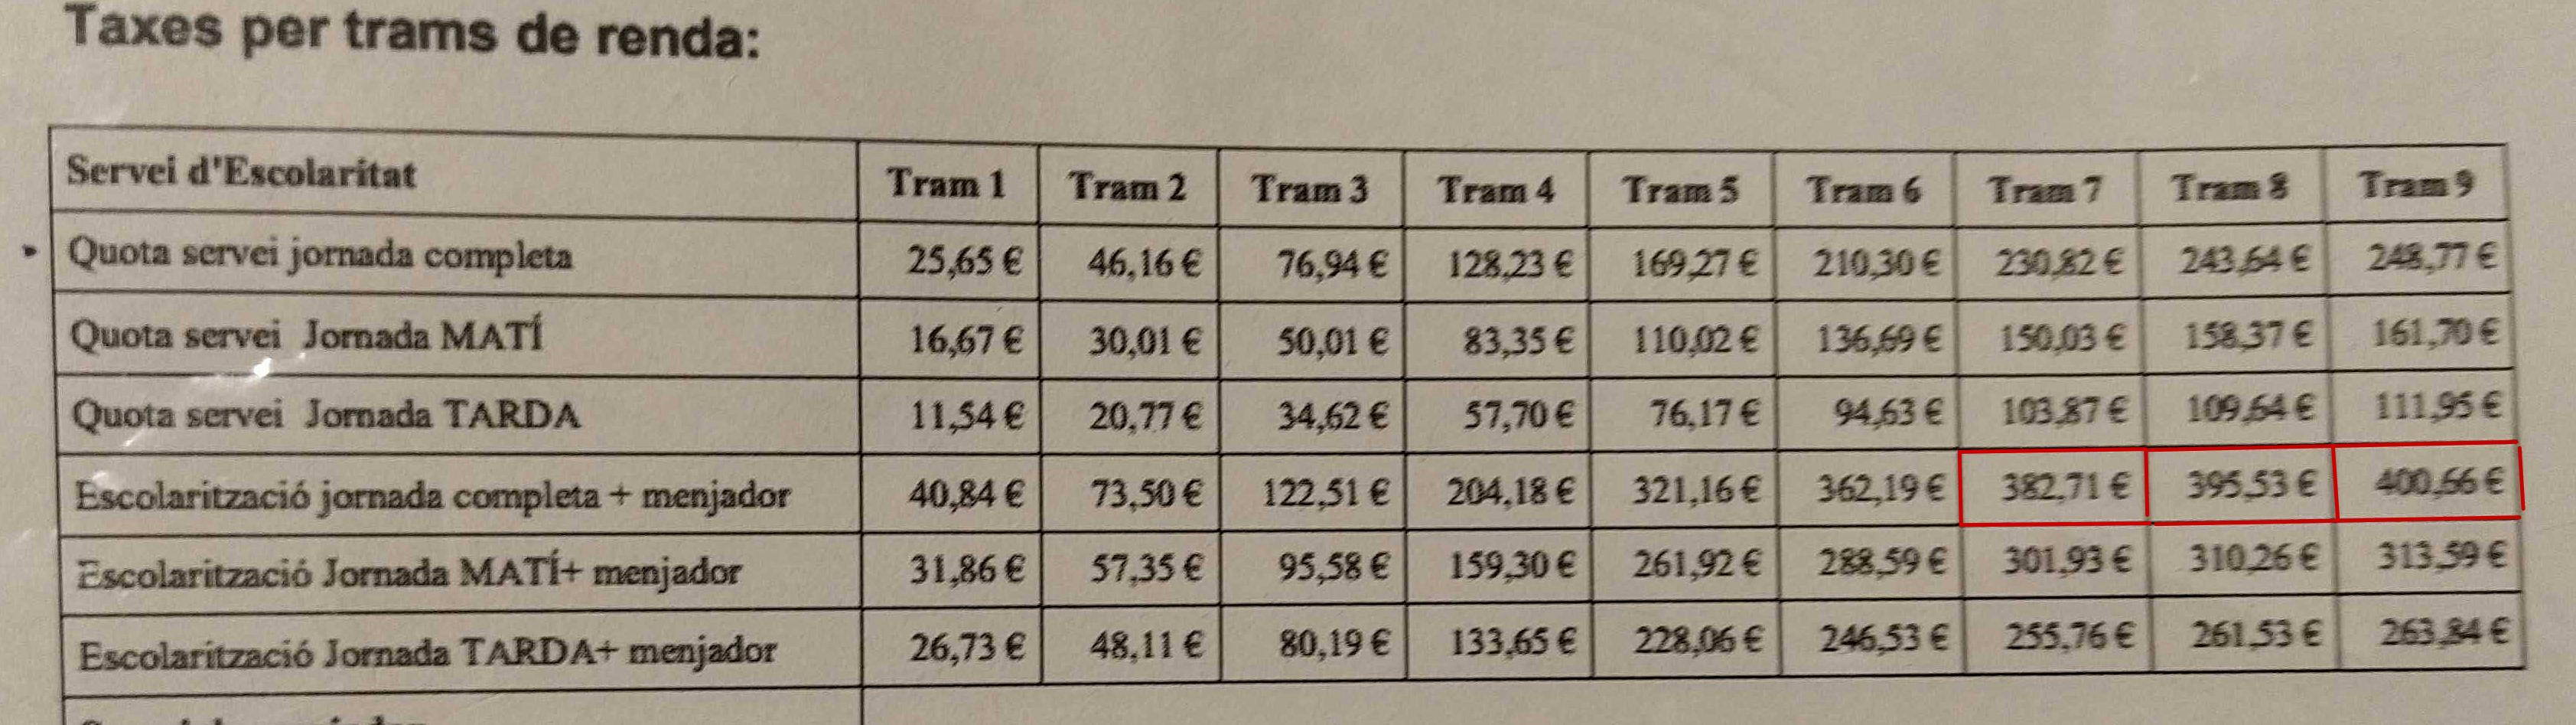

I ara arribem al punt que m'ha <del>inflat els pebrots</del> irritat. Resulta que el tram9 (sense límit superior) només pagarà 18€ més per quota, 180€ anuals. I així queda la redistribució proposada per l'ajuntament de Terrassa. Si Messi vol portar un potencial fill a una EBM egarenca, pagarà 180€ més que nosaltres. I no cal ser Messi, qualsevol família de _classe alta_, com per exemple, la unitat familiar de l'excel·lentíssim alcalde, amb uns ingressos bruts de [76000](https://www.naciodigital.cat/latorredelpalau/noticia/69606/aquestes-son-retribucions-dels-carrecs-electes-terrassa) + [71000](https://www.diba.cat/documents/446885/271029807/Llista+personal+eventual+15-06-21.xlsx/90765721-8beb-6385-9ce9-4faa67c4ac0e?t=1624259699416).  

\*No tinc res en contra l'alcalde o la gent amb més ingressos que jo, simplement les seves retribucions són públiques i és un exemple que ve bé. A més a més no te res a veure la situació familiar doncs té més fills (altres trams) i resumint desconec la seva situació particular# afegir fonts

### Llavors, la tarifació és justa o no? Com escalen els trams i les quotes?

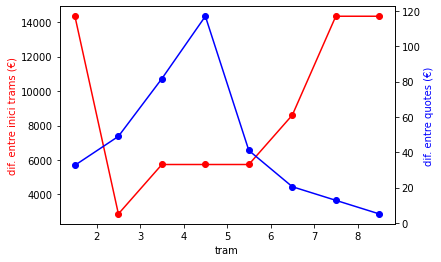

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

preus = np.array([40.84, 73.5, 122.51, 204.18, 321.16, 362.19, 382.71, 395.53, 400.66])
#trams = np.array(
#    [0, 11_951.6, 14_341.91, 19_122.55, 23_903.19, 28_683.83, 35_854.79, 47_806.38, 59_757.98, np.inf])   
trams = np.array(
    [0, 14341.91, 17210.3, 22947.06, 28683.83, 34420.59, 43025.74, 57367.66, 71709.57]
)
f, ax1 = plt.subplots()
ax1.plot(np.arange(8)+1.5,np.diff(trams), 'ro-')
ax2 = ax1.twinx()
ax2.plot(np.arange(8)+1.5, np.diff(preus), 'bo-')
ax1.set_xlabel('tram')
ax1.set_ylabel('dif. entre inici trams (€)', color='r')
ax2.set_ylabel('dif. entre quotes (€)', color='b');

Bé, com veiem a línia vermella de la figura anterior, l'amplitud dels trams es va dil·latant (excepte el primer\*). En altres paraules, cada cop es necessita més pastarrufa per saltar de tram. Llavors, el que es podria esperar és que la quota de l'EBM incrementés d'una manera similar o proporcional. No obstant, (línia blava) veiem que va incrementant notablement fins al tram 5 però llavors frena, fins arribar a l'increment ridícul de 5€ a l'últim tram.  
**Doncs no**. No sembla massa redistributiu, les rendes mitjes-baixes són les que tenen un increment de la quota més pronunciat

Per representar aquest fet, potser resultaria més útil una figura del percentatge d'ingressos que suposa la quota anual de l'EBM en funció dels ingressos

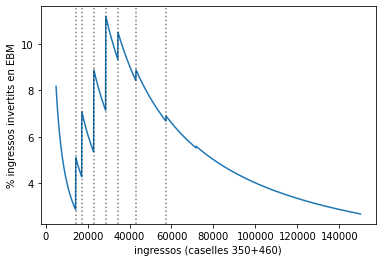

In [73]:
def perc_quota(ingressos):
    """retorna el percentatge que suposa la quota anual respecte els ingressos (per 1 fill)"""
    tram = np.searchsorted(trams, ingressos) # tram que correspon
    anualitat = preus[tram-1] * 10 # index 0-based, 10 quotes
    return 100 * anualitat / ingressos 
# generem dades per un rang d'ingressos i les visualitzem
rang_ingressos = np.arange(5000,150_001,100)
percentatges = [perc_quota(x) for x in rang_ingressos]

plt.plot(rang_ingressos, percentatges)
for edge in trams[1:-1]:
    plt.axvline(edge, c=(0,0,0,.5), ls=':')
plt.xlabel('ingressos (caselles 350+460)')
plt.ylabel('% ingressos invertits en EBM');
# provar plotly express

In [71]:
# import plotly.express as px
# fig = px.line(x=rang_ingressos, y=percentatges,
#              labels={'x':'ingressos (caselles 350+460)', 'y':'% ingressos invertits en EBM'})
# fig.write_html('../other/quotatramsEBM.html')
# fig.show()
# https://pastorjordi.github.io/htmlfigs/quotatramsEBM.html

<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://pastorjordi.github.io/htmlfigs/quotatramsEBM.html" height="525" width="100%"></iframe>

veient-ho així es veu que hi ha gent a qui li suposa una despesa considerablement superior que a nosaltres (7.5% dels ingressos\*). No obstant, que el tram superior arranqui desde menys d'un 6% atufa una mica

Per altra banda, una part dels trams més castigats podrien escaquejar-se. No em queda clar en el cas de no fer la declaració en quin tram s'assigna si no es fa la declaració. (Per exemple una parella amb 2 sous de 18.000€ bruts/any). Així que el tram 6 té numeros de ser el putejat màxim. Novament la *classe mitja* assumeix el gruix d'esforços econòmics? Sort que tenim un govern d'esquerres...

M'agradaria deixar clar que la meva queixa és que no hi hagi redistribució entre rendes mitges i altes. Si no hi ha calers, no em sap greu pagar la meva part corresponent de 3827€ per a què el meu fill pugui gaudir d'uns bons serveis i d'altres nanos també.  
Així a "ojo de buen cubero" potser hi hauria d'haver uns 13 trams. El problema probablement és que als trams superiors hi ha poca població (no paguin per suplir els altres). L'altre, que si la quota puja de 450€ ja es comença a equiparar a la despesa que suposa una escola bressol privada (que te altres avantatges com ara que **segueixen obertes al juliol**) pel que es podria esperar una fuga d'usuaris.  
Així que **el que calen són calers i que l'educació infantil no sigui el correus2.0**

### podem tirar més merda a la gestió municipal?

**PS**: M'ha arribat desde un conegut que la EB de la Generalitat li farà arribar un rebut de 285€ mensuals. Podem fotre merda a la gestió municipal directament llavors? O ens sortiran per peteneres? (aka, és culpa de la Gene que no paga, i els altres: és culpa d'Espanya que ens roba)

In [4]:
!wget https://opendata.terrassa.cat/dataset/e41afc19-d8aa-4e60-93df-88a87ec454a4/resource/fac07516-8cf1-426f-8df1-f11b6164b801/download/actual_pressupost_despeses.csv -P ../data/

--2021-06-22 14:10:44--  https://opendata.terrassa.cat/dataset/e41afc19-d8aa-4e60-93df-88a87ec454a4/resource/fac07516-8cf1-426f-8df1-f11b6164b801/download/actual_pressupost_despeses.csv
Resolving opendata.terrassa.cat (opendata.terrassa.cat)... 2606:4700:20::ac43:48df, 2606:4700:20::681a:8b7, 2606:4700:20::681a:9b7, ...
Connecting to opendata.terrassa.cat (opendata.terrassa.cat)|2606:4700:20::ac43:48df|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5266777 (5,0M) [text/csv]
Saving to: ‘../data/actual_pressupost_despeses.csv’

actual_pressupost_d 100%[===================>]   5,02M  1,35MB/s    in 3,6s    

2021-06-22 14:10:47 (1,38 MB/s) - ‘../data/actual_pressupost_despeses.csv’ saved [5266777/5266777]



In [26]:
df = pd.read_csv('../data/actual_pressupost_despeses.csv', decimal=",")
print(df.dtypes)
df.tail()

EXERCICI_COMPTAB          int64
AREA                     object
SERVEI                   object
PROGRAMA                 object
CAPITOL                  object
PARTIDA                  object
DESCRIPCIO_PARTIDA       object
PRESSUPOST_DEFINITIU    float64
LIQUIDACIO              float64
dtype: object


,EXERCICI_COMPTAB,AREA,SERVEI,PROGRAMA,CAPITOL,PARTIDA,DESCRIPCIO_PARTIDA,PRESSUPOST_DEFINITIU,LIQUIDACIO
33631,2021,8-Estructura Territorial i Ate,8464-Estructura Territorial i,9-ACTUACIONES DE CARÁCTER GENE,2-DESPESES EN BÉNS CORRENTS I,21 8464 92403 22605,INDEMNITZACIONS - DINAMITZACIO,NaN,5638.08
33632,2021,8-Estructura Territorial i Ate,8464-Estructura Territorial i,9-ACTUACIONES DE CARÁCTER GENE,2-DESPESES EN BÉNS CORRENTS I,21 8464 92403 22609,ACTIVITATS CULTURALS I ESPORTI,NaN,486.20
33633,2021,8-Estructura Territorial i Ate,8464-Estructura Territorial i,9-ACTUACIONES DE CARÁCTER GENE,2-DESPESES EN BÉNS CORRENTS I,21 8464 92403 22799,ALTR. TREBALLS REALIT PER ALTR,NaN,52101.27
33634,2021,8-Estructura Territorial i Ate,8464-Estructura Territorial i,9-ACTUACIONES DE CARÁCTER GENE,2-DESPESES EN BÉNS CORRENTS I,21 8464 92404 22799,ALTR. TREBALLS REALIT PER ALTR,NaN,556.60
33635,2021,8-Estructura Territorial i Ate,8464-Estructura Territorial i,9-ACTUACIONES DE CARÁCTER GENE,4-TRASFERÈNCIES CORRENTS,21 8464 92403 48900,ALTRES TRANSFERÈNCIES SENSE FI,NaN,268976.63


aqui s'exemplifica un dels problemes que em trobo sovint. Buscar despeses concretes a les dades obertes, és com buscar una agulla en un paller. Els camps tallats i/o abreviatures no ajuden. On recony estaran les despeses de les EBM als pressupostos de 2021?

In [27]:
df.AREA.unique()

array([nan, '0-Presidència', '1-Serveis Territorials i Segur',
       '2-Urbanisme i Sostenibilitat', '3-Serveis Generals i Govern Ob',
       '4-Drets Socials', '5-Cicles de la Vida', '6-Promoció Econòmica',
       '7-Projecció de la Ciutat', '8-Estructura Territorial i Ate'],
      dtype=object)

In [51]:
df.SERVEI.unique()

array([nan, '0000-Coordinació i Serv. Centr', '0111-Presidència',
       '0113-Premsa', '0463-Comunicació', '0464-DESCRIPCIÓ: 0464',
       '0467-DESCRIPCIÓ: 0467', '0468-DESCRIPCIÓ: 0468',
       '0469-DESCRIPCIÓ: 0469', '0491-Serveis Comunicació',
       '0752-Relacions Europees i Inte', '1000-Coordinació i Serv. Centr',
       '1222-Via Pública i Policia Mun', '1224-Mobilitat',
       '1314-Habitatge', '1414-Protecció de la Salut',
       '1431-DESCRIPCIÓ: 1431', '1432-Urbanisme',
       '1433-Servei d Obres i Mantenim', '1434-DESCRIPCIÓ: 1434',
       '1436-DESCRIPCIÓ: 1436', '1437-Pla de Barris',
       '1438-DESCRIPCIÓ: 1438', '1441-DESCRIPCIÓ: 1441',
       '1442-Eco-Equip, S.A.M.', '1443-DESCRIPCIÓ: 1443',
       '1511-DESCRIPCIÓ: 1511', '1513-DESCRIPCIÓ: 1513',
       '1533-Medi Ambient', '2000-Coordinació i Serv. Centr',
       '2011-Deute Públic', '2121-Tecnologia i Sistemes d I',
       '2122-Organització i Recursos H', '2125-DESCRIPCIÓ: 2125',
       '2424-DESCRIPCIÓ: 2424

Com veieu, camps merdosos buits (xxxx-DESCRIPCIÓ: xxxx). Però com a mínim el csv és accessible. A diferència dels grups escolars confinats (no n'hi ha prou en distribuir-se via twitter sinó que a sobre són imatges) ;)  
Després de furgar 10 minuts he trobat el servei d'educació. No invertiré massa temps amb això.

4 números guarros per unes dades guarres

In [68]:
pressupost_2021_tot = df.loc[df.EXERCICI_COMPTAB==2021, 'LIQUIDACIO'].dropna().sum()
pressupost_2021_edu = df.loc[
    (df.SERVEI.str.contains('-Servei d Educació', na=False)) & (df.EXERCICI_COMPTAB==2021),
    'LIQUIDACIO'
].dropna().sum()

print(
    f"s'inverteix un {round(100 * pressupost_2021_edu / pressupost_2021_tot, 2)} en educació"
)

# https://youtu.be/pFG5PO50AG4


s'inverteix un 12.43 en educació


<iframe width="560" height="315" src="https://www.youtube.com/embed/pFG5PO50AG4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>